# LSTM Multiserie e Multivariada

## Dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

In [54]:
trip = pd.read_csv("./data/ieee/TripA01.csv", sep=";", encoding='unicode_escape')
trip.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


In [55]:
trip.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

In [56]:
trip.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,...,10090.000000,10090.0,10090.0,10090.0,10090.000000,10090.0,10090.0,10090.0,10090.000000,10090.000000
mean,504.450000,26.502170,566.791625,26.470424,8.106545,0.014246,0.118162,388.483996,-11.953476,21.940141,...,1.610408,1.0,0.0,0.0,30.769972,0.0,0.0,0.0,8.589470,23.907057
std,291.287644,15.497032,5.577563,16.370510,42.123984,0.741669,0.322172,2.158318,22.799614,0.237147,...,0.340490,0.0,0.0,0.0,1.619032,0.0,0.0,0.0,7.124407,1.249755
min,0.000000,0.000000,558.000000,0.000000,-87.050000,-2.290000,0.000000,380.420000,-100.700000,21.000000,...,0.400000,1.0,0.0,0.0,25.500000,0.0,0.0,0.0,5.000000,22.170000
25%,252.225000,15.362500,562.090000,13.550000,-9.157500,-0.330000,0.000000,387.190000,-22.197500,22.000000,...,1.580000,1.0,0.0,0.0,30.500000,0.0,0.0,0.0,5.000000,22.670000
50%,504.450000,29.550000,565.000000,31.100000,4.630000,0.020000,0.000000,388.540000,-8.570000,22.000000,...,1.670000,1.0,0.0,0.0,31.000000,0.0,0.0,0.0,5.000000,24.000000
75%,756.675000,38.720000,574.000000,40.357500,23.540000,0.350000,0.000000,390.000000,-1.990000,22.000000,...,1.760000,1.0,0.0,0.0,32.000000,0.0,0.0,0.0,7.000000,25.010000
max,1008.900000,53.300000,574.000000,55.900000,174.420000,2.790000,1.000000,394.470000,66.220000,22.000000,...,2.520000,1.0,0.0,0.0,33.500000,0.0,0.0,0.0,30.500000,25.840000


In [57]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time [s]                             10090 non-null  float64
 1   Velocity [km/h]                      10090 non-null  float64
 2   Elevation [m]                        10090 non-null  float64
 3   Throttle [%]                         10090 non-null  float64
 4   Motor Torque [Nm]                    10090 non-null  float64
 5   Longitudinal Acceleration [m/s^2]    10090 non-null  float64
 6   Regenerative Braking Signal          10090 non-null  float64
 7   Battery Voltage [V]                  10090 non-null  float64
 8   Battery Current [A]                  10090 non-null  float64
 9   Battery Temperature [°C]             10090 non-null  float64
 10  max. Battery Temperature [°C]        10090 non-null  float64
 11  SoC [%]                     

In [58]:
trip = trip.sort_values("Time [s]")
trip.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


## Preprocessamento

In [59]:
X = trip.drop(columns=['Time [s]', 'Motor Torque [Nm]']).values
y = trip['Motor Torque [Nm]'].values

In [60]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

## Janelamento e Treinamento do Modelo

In [86]:
def LSTM_model(data, labels, window_size=10, train_size=0.8, epochs=10):
    # Janelando os dados
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(data)):
        X_seq.append(data[i-window_size:i, :])
        y_seq.append(labels[i])
        
    X_seq, y_seq = np.array(X_seq), np.array(y_seq)

    
    # Divisão de treino e teste com 80% para treino e 20% para teste
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]


    # Criando e treinando o modelo
    model = Sequential(
        [
            LSTM(32, activation='tanh', input_shape=(1, X_train.shape[2])),
            Dense(32, activation='relu'), 
            Dense(1) 
        ]
    )

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)


    # Imprimindo a avaliação
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    loss, mae = model.evaluate(X_test, y_test)
    print(f"MAE: {mae:.8f}, Loss: {loss:.8f}")

    return model

Epoch 1/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1326.1748 - mae: 24.5602 - val_loss: 332.3317 - val_mae: 13.0034
Epoch 2/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 168.0559 - mae: 8.5366 - val_loss: 298.7724 - val_mae: 13.1120
Epoch 3/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 71.9404 - mae: 5.8256 - val_loss: 144.8176 - val_mae: 9.2056
Epoch 4/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 45.9803 - mae: 4.6836 - val_loss: 375.1259 - val_mae: 14.5835
Epoch 5/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 34.7877 - mae: 4.0874 - val_loss: 183.0311 - val_mae: 10.3925
Epoch 6/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 33.3342 - mae: 4.0303 - val_loss: 143.6091 - val_mae: 8.5944
Epoch 7/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 27.6657 - mae: 3.6471 - val_loss: 154.8672 - val_mae: 8.8055
Epoch 8/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 23.0033 - mae: 3.2950 - val_loss: 193.9076 - val_mae: 9.9565
Epoch 9/20

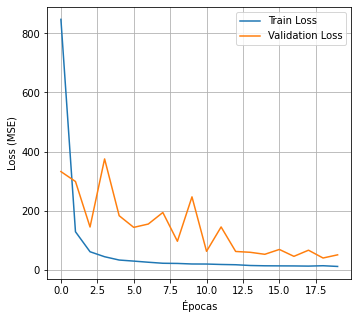

In [65]:
model = LSTM_model(X_scaled, y, window_size=10, train_size=0.8, epochs=20)

## Concatenar Duas Series (sem sobreposição de janelas) com Treinamento do modelo

In [94]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

/home/andre/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [48]:
directory = "./data/ieee/"
files = os.listdir(directory)
files.sort()

trips = []
for file in files:
    trip = pd.read_csv(directory + file, sep=";", encoding='unicode_escape')
    trip['Trip'] = file.split(".")[0]
    trips.append(trip)

trips = pd.concat(trips)
trips.shape

(1094793, 51)

In [64]:
trips['Trip'].unique()

array(['TripA01', 'TripA02', 'TripA03', 'TripA04', 'TripA05', 'TripA06',
       'TripA07', 'TripA08', 'TripA09', 'TripA10', 'TripA11', 'TripA12',
       'TripA13', 'TripA14', 'TripA15', 'TripA16', 'TripA17', 'TripA18',
       'TripA19', 'TripA20', 'TripA21', 'TripA22', 'TripA23', 'TripA24',
       'TripA25', 'TripA26', 'TripA27', 'TripA28', 'TripA29', 'TripA30',
       'TripA31', 'TripA32', 'TripB01', 'TripB02', 'TripB03', 'TripB04',
       'TripB05', 'TripB06', 'TripB07', 'TripB08', 'TripB09', 'TripB10',
       'TripB11', 'TripB12', 'TripB13', 'TripB14', 'TripB15', 'TripB16',
       'TripB17', 'TripB18', 'TripB19', 'TripB20', 'TripB21', 'TripB22',
       'TripB23', 'TripB24', 'TripB25', 'TripB26', 'TripB27', 'TripB28',
       'TripB29', 'TripB30', 'TripB31', 'TripB32', 'TripB33', 'TripB34',
       'TripB35', 'TripB36', 'TripB37', 'TripB38'], dtype=object)

In [65]:
X = trips.drop(columns=['Time [s]', 'Motor Torque [Nm]', 'Trip'])
y = trips['Motor Torque [Nm]'].values

In [66]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X.values)

In [67]:
X_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=X.index
)
X_scaled['Trip'] = trips['Trip']
X_scaled

,Velocity [km/h],Elevation [m],Throttle [%],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],...,Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]],Trip
0,0.0,0.600904,0.0,0.667161,0.0,0.963871,0.732742,0.666667,0.371567,0.981921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TripA01
1,0.0,0.600904,0.0,0.669385,0.0,0.963871,0.732724,0.666667,0.371567,0.981921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TripA01
2,0.0,0.600904,0.0,0.668643,0.0,0.963871,0.732632,0.666667,0.371567,0.981921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TripA01
3,0.0,0.600904,0.0,0.667161,0.0,0.963871,0.732560,0.666667,0.371567,0.981921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TripA01
4,0.0,0.600904,0.0,0.667161,0.0,0.963871,0.732560,0.666667,0.371567,0.981921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TripA01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16424,NaN,0.171060,0.0,0.666420,0.0,0.703002,0.729462,0.121212,0.064620,0.551412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TripB38
16425,NaN,0.171060,0.0,0.666420,0.0,0.703540,0.729098,0.121212,0.064620,0.551412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TripB38
16426,NaN,0.171060,0.0,0.666420,0.0,0.703002,0.729371,0.121212,0.064620,0.551412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TripB38
16427,NaN,0.171060,0.0,0.666420,0.0,0.702464,0.729645,0.121212,0.064620,0.551412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TripB38


In [72]:
def create_seq(X, y, window_size=10):
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(X)):
        data_slice = X.iloc[i-window_size:i, :]

        # Se tiver mais de uma trip na mesma janela, eu não adiciono no conjunto de dados
        if len(data_slice['Trip'].unique()) == 1:
            X_seq.append(data_slice.drop(columns=['Trip']).values)
            y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)


X_seq, y_seq = create_seq(X_scaled, y, window_size=10)
X_seq, y_seq

(array([[[0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         ...,
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan]],
 
        [[0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,        nan],
         ...,
         [0.        , 0.60090355, 0.        , ...,        nan,
                 nan,   

In [85]:
X_seq.tofile('./X_seq.dat')
y_seq.tofile('./y_seq.dat')

In [81]:
X_seq = np.fromfile('./X_seq.dat')
y_seq = np.fromfile('./y_seq.dat')

In [90]:
def LSTM_model(X_seq, y_seq, window_size=10, train_size=0.8, epochs=10):
    # Divisão de treino e teste com 80% para treino e 20% para teste
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]


    # Criando e treinando o modelo
    model = Sequential(
        [
            LSTM(32, activation='tanh', input_shape=(1, X_train.shape[2])),
            Dense(32, activation='relu'), 
            Dense(1) 
        ]
    )

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)


    # Imprimindo a avaliação
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    loss, mae = model.evaluate(X_test, y_test)
    print(f"MAE: {mae:.8f}, Loss: {loss:.8f}")

    return model

/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
54709/54709 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - loss: 1215.0599 - mae: 22.5197 - val_loss: 1348.8003 - val_mae: 23.7140
Epoch 2/3
54709/54709 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - loss: 1174.9873 - mae: 22.6302 - val_loss: 1348.5963 - val_mae: 23.7175
Epoch 3/3
54709/54709 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - loss: 1178.8405 - mae: 22.6410 - val_loss: 1348.0360 - val_mae: 23.7268
6839/6839 ━━━━━━━━━━━━━━━━━━━━ 4s 562us/step - loss: 1371.1348 - mae: 24.5135
MAE: 23.72699928, Loss: 1348.02697754


<Sequential name=sequential_2, built=True>

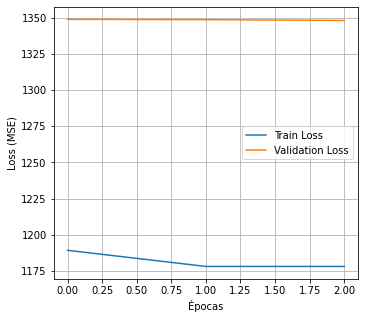

In [95]:
model = LSTM_model(X_seq, y_seq, window_size=10, train_size=0.8, epochs=3)
model